In [28]:
# 预备知识
from keras.utils import np_utils
import numpy as np

In [29]:
np.random.seed(10)
from keras.datasets import mnist
(x_train_image, y_train_label),(x_test_image, y_test_label) = mnist.load_data()

x_train = x_train_image.reshape(60000, 784).astype('float32')
x_test = x_test_image.reshape(10000, 784).astype('float32')

x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

y_trainOneHot = np_utils.to_categorical(y_train_label)
y_testOneHot = np_utils.to_categorical(y_test_label)

In [30]:
# 建立模型
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# 建立输入层和隐藏层
model.add(Dense(units = 256, input_dim = 784, kernel_initializer = 'normal', activation = 'relu'))

# 建立输出层
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

# 查看模型的摘要
print(model.summary())
# param字段表示了该层参数的个数：784(x)*256(w)+256(b)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
# 定义训练方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 开始训练
train_history = model.fit(x= x_train_normalize, y= y_trainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.4379 - acc: 0.8830 - val_loss: 0.2185 - val_acc: 0.9407
Epoch 2/10
 - 2s - loss: 0.1910 - acc: 0.9456 - val_loss: 0.1556 - val_acc: 0.9561
Epoch 3/10
 - 2s - loss: 0.1354 - acc: 0.9619 - val_loss: 0.1259 - val_acc: 0.9646
Epoch 4/10
 - 2s - loss: 0.1027 - acc: 0.9705 - val_loss: 0.1119 - val_acc: 0.9685
Epoch 5/10
 - 2s - loss: 0.0811 - acc: 0.9774 - val_loss: 0.0979 - val_acc: 0.9716
Epoch 6/10
 - 3s - loss: 0.0661 - acc: 0.9817 - val_loss: 0.0936 - val_acc: 0.9718
Epoch 7/10
 - 2s - loss: 0.0545 - acc: 0.9851 - val_loss: 0.0910 - val_acc: 0.9742
Epoch 8/10
 - 2s - loss: 0.0460 - acc: 0.9874 - val_loss: 0.0819 - val_acc: 0.9765
Epoch 9/10
 - 2s - loss: 0.0382 - acc: 0.9900 - val_loss: 0.0814 - val_acc: 0.9767
Epoch 10/10
 - 2s - loss: 0.0317 - acc: 0.9917 - val_loss: 0.0807 - val_acc: 0.9768


In [32]:
# 下面就是通过读取train_history来显示训练的详细过程
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    # 这三个参数分别是：（之前训练产生的train_history，训练集的结果，验证集的结果）
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('train history')
    plt.ylabel(train)
    plt.xlabel('epoch')
    plt.legend(['train','validation'], loc='upper left')
    
    plt.show()

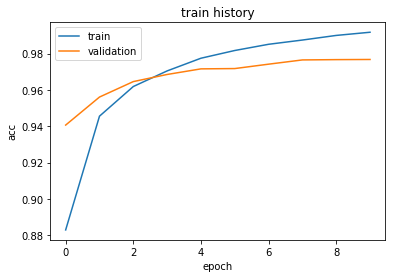

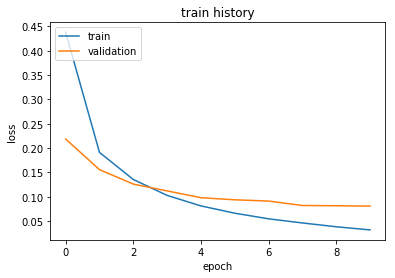

In [33]:
# 执行绘图结果
show_train_history(train_history, 'acc', 'val_acc')
show_train_history(train_history, 'loss', 'val_loss')

In [34]:
# 评估模型准确率
scores = model.evaluate(x_test_normalize, y_testOneHot)
print('accuracy=', scores[1])

10000/10000 [==============================] - 1s 72us/step
accuracy= 0.9757


In [35]:
# 进行预测
prediction = model.predict_classes(x_test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)